In [59]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt
import re
import sidetable
pd.options.display.max_columns=None

In [60]:
data= pd.read_csv('data_seleccionada.csv')
data.head(1)

,Unnamed: 0,q_1_age,q_2_gender,q_5_role,q_7_coding_languages_used,q_8_coding_languages_recommended,q_15_years_using_ml,q_20_industry,q_21_company_size,q_22_ds_team_size,q_23_current_use_of_ml,q_24_main_activities_work,q_25_yearly_compensation,q_26_ml_invested_money,q31_b_part_1,q31_b_part_2,q31_b_part_3,q31_b_part_4,q31_b_part_5,q31_b_part_6,q31_b_part_7,q31_b_part_8,q31_b_part_9,q31_b_other,q37_b_part_1,q37_b_part_2,q37_b_part_3,q37_b_part_4,q37_b_part_5,q37_b_part_6,q37_b_part_7,q37_b_other,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11,q40_other,q_41_primary_da_tool
0,0,50-54,Man,Other,"Python, R",Python,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,No (we do not use ML methods),None of these activities are an important par...,"25,000-29,999",$100-$999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,"Local development environments (RStudio, Jupyt..."


### `q23 current use ml y q21 tamaño de la empresa` 
¿Se utilizan métodos de ML en las grandes empresas? 

In [61]:
df_q23_q21 = data.copy()

In [62]:
df_q23_q21['q_23_current_use_of_ml'].unique()

array(['No (we do not use ML methods)',
       'We are exploring ML methods (and may one day put a model into production)',
       'I do not know',
       'We use ML methods for generating insights (but do not put working models into production)',
       nan,
       'We have well established ML methods (i.e., models in production for more than 2 years)',
       'We recently started using ML methods (i.e., models in production for less than 2 years)'],
      dtype=object)

In [63]:
df_q23_q21['q_21_company_size'].unique()

array(['50-249 employees', '1000-9,999 employees', nan,
       '10,000 or more employees', '0-49 employees', '250-999 employees'],
      dtype=object)

In [64]:
column = ['q_21_company_size']

for i in column: 
    df_q23_q21[i] = df_q23_q21[i].str.replace(",", "")

In [65]:
df_q23_q21['q_21_company_size'].unique()

array(['50-249 employees', '1000-9999 employees', nan,
       '10000 or more employees', '0-49 employees', '250-999 employees'],
      dtype=object)

In [66]:
df_q23_q21['q_21_company_size'].value_counts().reset_index()

,index,q_21_company_size
0,0-49 employees,5055
1,10000 or more employees,3416
2,1000-9999 employees,3059
3,50-249 employees,2567
4,250-999 employees,2154


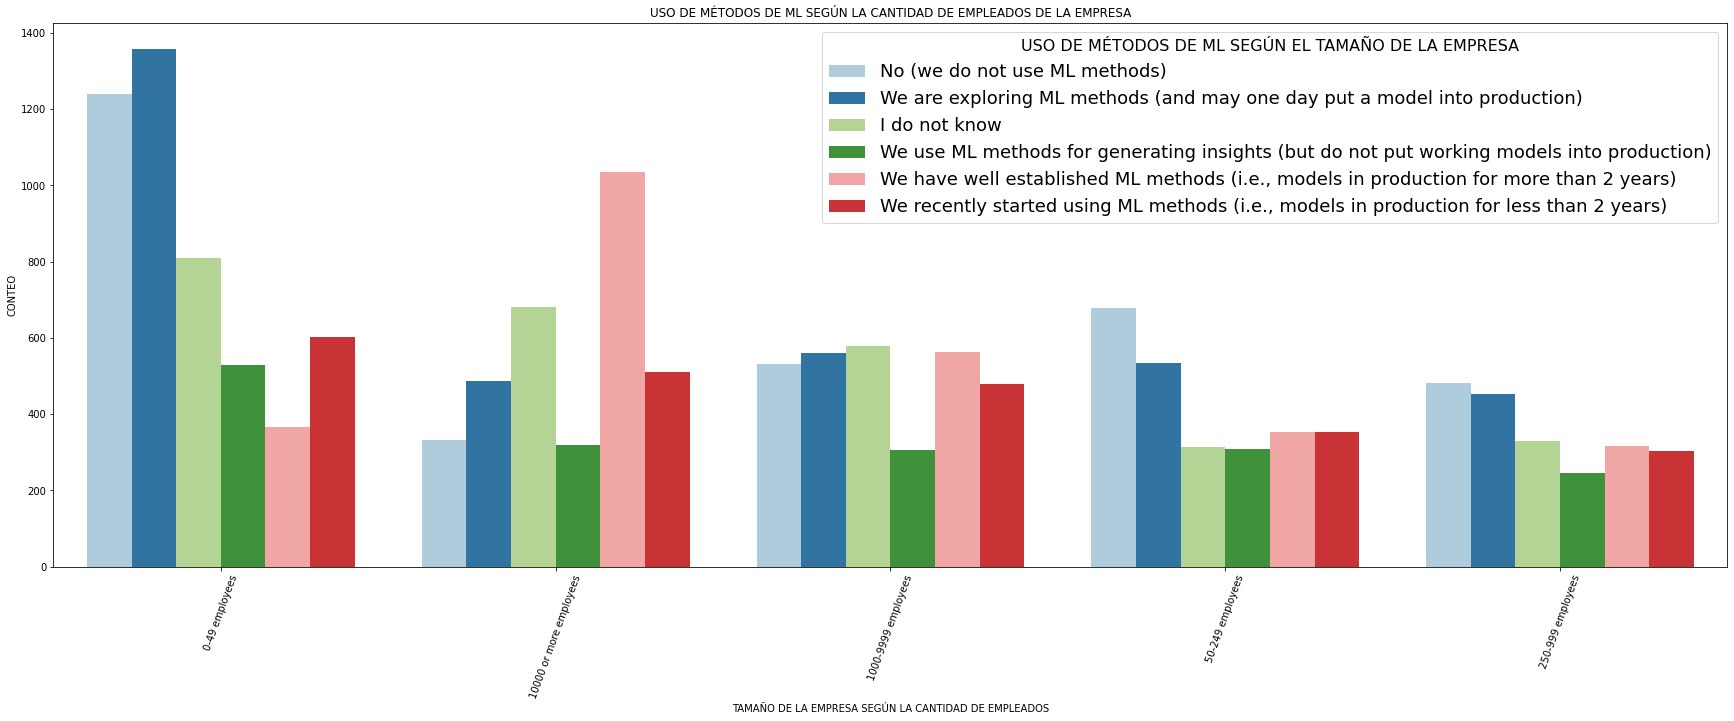

In [67]:
plt.figure(figsize=(30,10))
fig = sns.countplot(data = df_q23_q21, x = 'q_21_company_size', hue = 'q_23_current_use_of_ml', palette='Paired', order = df_q23_q21['q_21_company_size'].value_counts().index)

plt.title("USO DE MÉTODOS DE ML SEGÚN LA CANTIDAD DE EMPLEADOS DE LA EMPRESA")
legend = plt.legend(prop={'size':18}, loc='upper right')
legend.set_title ("USO DE MÉTODOS DE ML SEGÚN EL TAMAÑO DE LA EMPRESA", prop = {'size': 16})
fig.set(xlabel = 'TAMAÑO DE LA EMPRESA SEGÚN LA CANTIDAD DE EMPLEADOS', ylabel = 'CONTEO' )

plt.xticks(rotation=70)

plt.show();

### `q21 tamaño empresa y q26 inversión en ml` 

¿Cuál es la relación entre la inversión en ML y dependiendo del tamaño de la empresa?

In [68]:
df_q21_q26 = data.copy()
df_q21_q26.head(2)

,Unnamed: 0,q_1_age,q_2_gender,q_5_role,q_7_coding_languages_used,q_8_coding_languages_recommended,q_15_years_using_ml,q_20_industry,q_21_company_size,q_22_ds_team_size,q_23_current_use_of_ml,q_24_main_activities_work,q_25_yearly_compensation,q_26_ml_invested_money,q31_b_part_1,q31_b_part_2,q31_b_part_3,q31_b_part_4,q31_b_part_5,q31_b_part_6,q31_b_part_7,q31_b_part_8,q31_b_part_9,q31_b_other,q37_b_part_1,q37_b_part_2,q37_b_part_3,q37_b_part_4,q37_b_part_5,q37_b_part_6,q37_b_part_7,q37_b_other,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11,q40_other,q_41_primary_da_tool
0,0,50-54,Man,Other,"Python, R",Python,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,No (we do not use ML methods),None of these activities are an important par...,"25,000-29,999",$100-$999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,"Local development environments (RStudio, Jupyt..."
1,1,50-54,Man,Program/Project Manager,"SQL, C, C++, Java",Python,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees",1-2,We are exploring ML methods (and may one day p...,Build and/or run the data infrastructure that...,"60,000-69,999",$0 ($USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,Google Cloud AutoML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,NaN,NaN,"Advanced statistical software (SPSS, SAS, etc.)"


In [69]:
df_q21_q26['q_21_company_size'].unique()

array(['50-249 employees', '1000-9,999 employees', nan,
       '10,000 or more employees', '0-49 employees', '250-999 employees'],
      dtype=object)

In [70]:
column = ['q_21_company_size']

for i in column: 
    df_q21_q26[i] = df_q21_q26[i].str.replace(",", "")

In [71]:
df_q21_q26['q_21_company_size'].unique()

array(['50-249 employees', '1000-9999 employees', nan,
       '10000 or more employees', '0-49 employees', '250-999 employees'],
      dtype=object)

In [72]:
df_q21_q26['q_26_ml_invested_money'].unique()

array(['$100-$999', '$0 ($USD)', '$1000-$9,999', nan, '$1-$99',
       '$100,000 or more ($USD)', '$10,000-$99,999'], dtype=object)

In [73]:
df_q21_q26["q_26_ml_invested_money"]=df_q21_q26["q_26_ml_invested_money"].fillna('Undefined')

In [74]:
patron1= 'Undefined'

patron2= '\$0\s\(\$USD\)'

patron3= '\$100\-\$999'

patron4= '\$1\-\$99'

patron5= '\$10\,000\-\$99\,999'

patron6= '\$100\,000\sor\smore\s\(\$USD\)'

In [75]:
def rango(val):

    if re.findall(patron1,val):
        return val.replace(val,'Undefined')
    elif re.findall(patron2,val):
        return val.replace(val,'0$')  
    elif re.findall(patron3,val):
        return val.replace(val,"1-99$")
    elif re.findall(patron4,val):
        return val.replace(val,"100-999$")
    elif re.findall(patron5,val):
        return val.replace(val,"1000-9999$")
    elif re.findall(patron6,val):
        return val.replace(val,"100000$ or more")

In [76]:
df_q21_q26['q_26_ml_invested_money'] = df_q21_q26['q_26_ml_invested_money'].apply(rango)

In [77]:
df_q21_q26['q_26_ml_invested_money'].unique()

array(['1-99$', '0$', None, 'Undefined', '100-999$', '100000$ or more',
       '1000-9999$'], dtype=object)

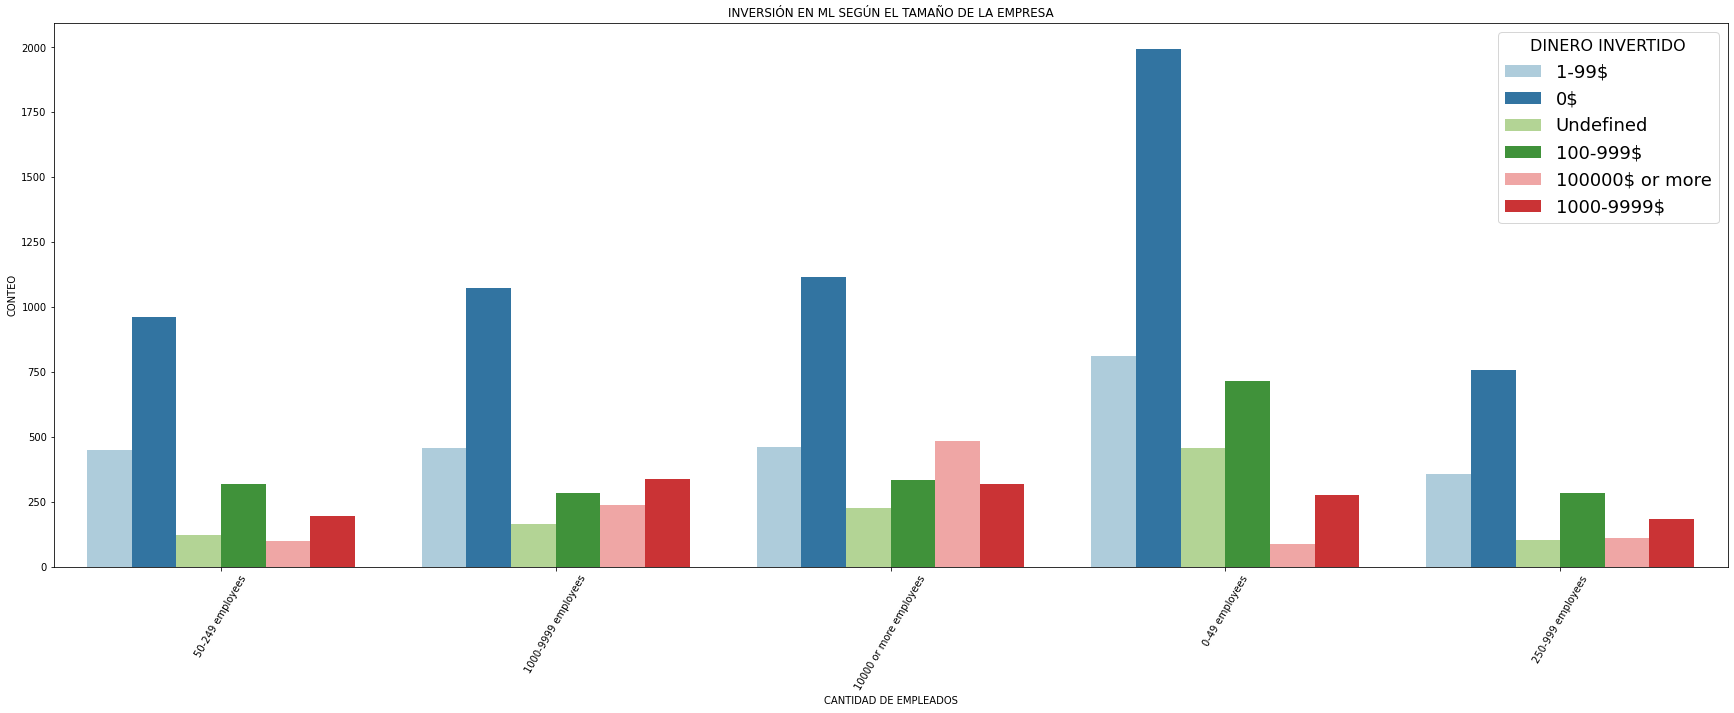

In [78]:
plt.figure(figsize=(30,10))
fig = sns.countplot(data = df_q21_q26, x = 'q_21_company_size', hue = 'q_26_ml_invested_money', palette='Paired')
fig.set_title("INVERSIÓN EN ML SEGÚN EL TAMAÑO DE LA EMPRESA")
fig.set(xlabel = 'CANTIDAD DE EMPLEADOS', ylabel = 'CONTEO') 
legend = plt.legend(prop={'size':18}, loc='upper right')
legend.set_title ("DINERO INVERTIDO", prop = {'size': 16})
plt.xticks(rotation=60)

plt.show(); 

plt.show();

### `q15 Años de experiencia` 
¿Realmente se necesita experiencia para poder ejercer con ML?



In [79]:
df_q15 = data.copy()
df_q15.head(2)

,Unnamed: 0,q_1_age,q_2_gender,q_5_role,q_7_coding_languages_used,q_8_coding_languages_recommended,q_15_years_using_ml,q_20_industry,q_21_company_size,q_22_ds_team_size,q_23_current_use_of_ml,q_24_main_activities_work,q_25_yearly_compensation,q_26_ml_invested_money,q31_b_part_1,q31_b_part_2,q31_b_part_3,q31_b_part_4,q31_b_part_5,q31_b_part_6,q31_b_part_7,q31_b_part_8,q31_b_part_9,q31_b_other,q37_b_part_1,q37_b_part_2,q37_b_part_3,q37_b_part_4,q37_b_part_5,q37_b_part_6,q37_b_part_7,q37_b_other,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11,q40_other,q_41_primary_da_tool
0,0,50-54,Man,Other,"Python, R",Python,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,No (we do not use ML methods),None of these activities are an important par...,"25,000-29,999",$100-$999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,"Local development environments (RStudio, Jupyt..."
1,1,50-54,Man,Program/Project Manager,"SQL, C, C++, Java",Python,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees",1-2,We are exploring ML methods (and may one day p...,Build and/or run the data infrastructure that...,"60,000-69,999",$0 ($USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,Google Cloud AutoML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,NaN,NaN,"Advanced statistical software (SPSS, SAS, etc.)"


In [80]:
df_q15['q_15_years_using_ml'].unique()

array(['5-10 years', '< 1 year', 'I do not use machine learning methods',
       '10-20 years', '2-3 years', nan, '1-2 years', '4-5 years',
       '3-4 years', '20 or more years'], dtype=object)

In [81]:
df_q15['q_15_years_using_ml'] = df_q15['q_15_years_using_ml'].fillna('Undefined')

In [82]:
df_q15['q_15_years_using_ml'].unique()

array(['5-10 years', '< 1 year', 'I do not use machine learning methods',
       '10-20 years', '2-3 years', 'Undefined', '1-2 years', '4-5 years',
       '3-4 years', '20 or more years'], dtype=object)

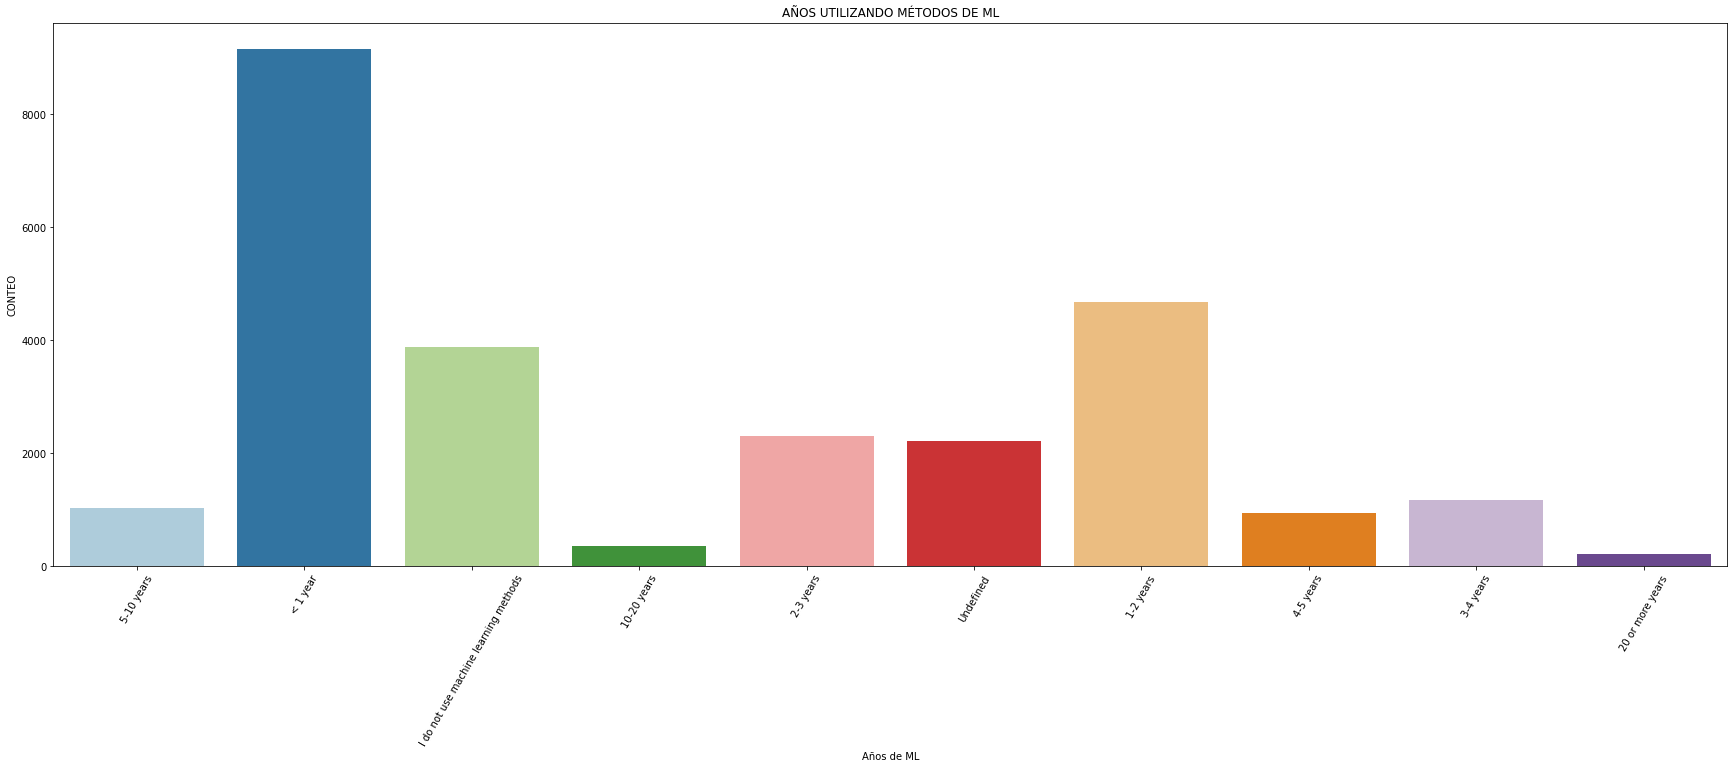

In [88]:
plt.figure(figsize=(30,10))
fig = sns.countplot(data = df_q15, x = 'q_15_years_using_ml', palette='Paired')
fig.set_title("AÑOS UTILIZANDO MÉTODOS DE ML")
fig.set(xlabel = 'Años de ML', ylabel = 'CONTEO') 

plt.xticks(rotation=60)


plt.show();